# Time series analysis

### Importing necessary libraries

In [1]:
import nbimporter
import numpy as np
import pandas as pd
import model_functions as nb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

### Data processing

In [2]:
df = nb.process_data()
df['age'] = df.apply(lambda row: row['trans_year']-row['dob'].year-((row['trans_month'], row['trans_day'])<(row['dob'].month, row['dob'].day)), axis=1)

In [3]:
# Rename some columns
df['timestamp'] = pd.to_datetime(df[['trans_year', 'trans_month', 'trans_day', 'trans_hour', 'trans_minute', 'trans_second']].rename(
    columns={'trans_year': 'year', 'trans_month': 'month', 'trans_day': 'day', 'trans_hour': 'hour', 'trans_minute': 'minute', 'trans_second': 'second'}))
df = df.drop(['trans_year', 'trans_month', 'trans_day', 'trans_hour', 'trans_minute', 'trans_second', 'dob'], axis=1)

In [4]:
# setting the timestamp as an index
df = df.set_index('timestamp')
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

In [5]:
# separated fraud from non fraud transactions
df_fraud = df[df['is_fraud'] == 1]
df_fraud_cc = df_fraud[df_fraud['fraud_type'] == 2]
df_fraud_b = df_fraud[df_fraud['fraud_type'] == 1]

### Fraud overview

In [21]:
# summing the amount of fraud by hour, day, week, and month
fraud_by_hours = df_fraud['amt'].resample('h').sum()
fraud_by_days = df_fraud['amt'].resample('D').sum()
fraud_by_weeks = df_fraud['amt'].resample('W').sum()
fraud_by_months = df_fraud['amt'].resample('ME').sum()

# summing the amount of credit card fraud by hour, day, week, and month
fraud_cc_by_hours = df_fraud_cc['amt'].resample('h').sum()
fraud_cc_by_days = df_fraud_cc['amt'].resample('D').sum()
fraud_cc_by_weeks = df_fraud_cc['amt'].resample('W').sum()
fraud_cc_by_months = df_fraud_cc['amt'].resample('ME').sum()

# summing the amount of bank fraud of bank by hour, day, week, and month
fraud_b_by_hours = df_fraud_b['amt'].resample('h').sum()
fraud_b_by_days = df_fraud_b['amt'].resample('D').sum()
fraud_b_by_weeks = df_fraud_b['amt'].resample('W').sum()
fraud_b_by_months = df_fraud_b['amt'].resample('ME').sum()

#### Hourly

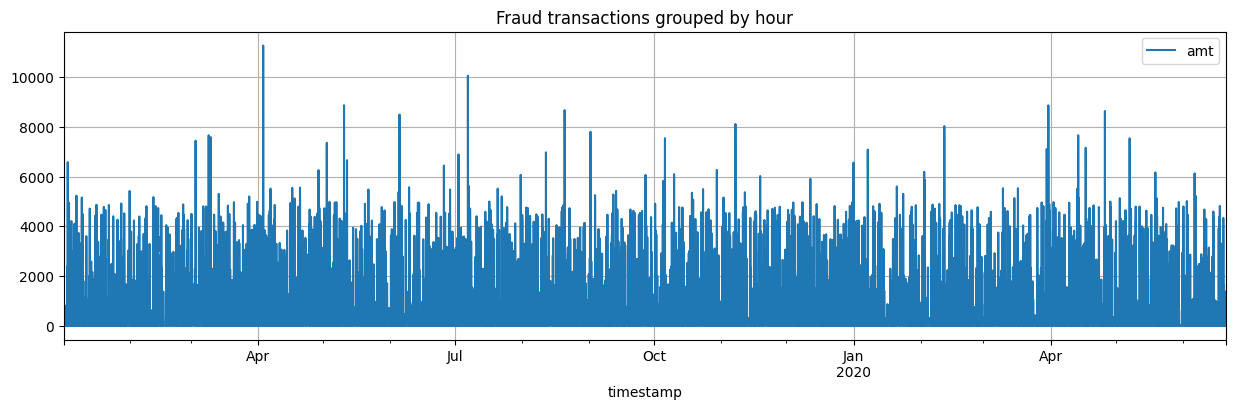

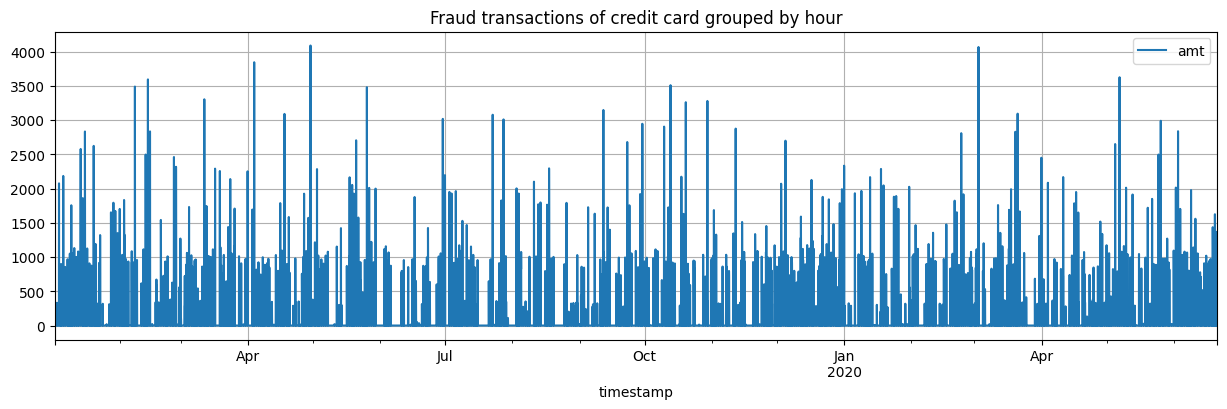

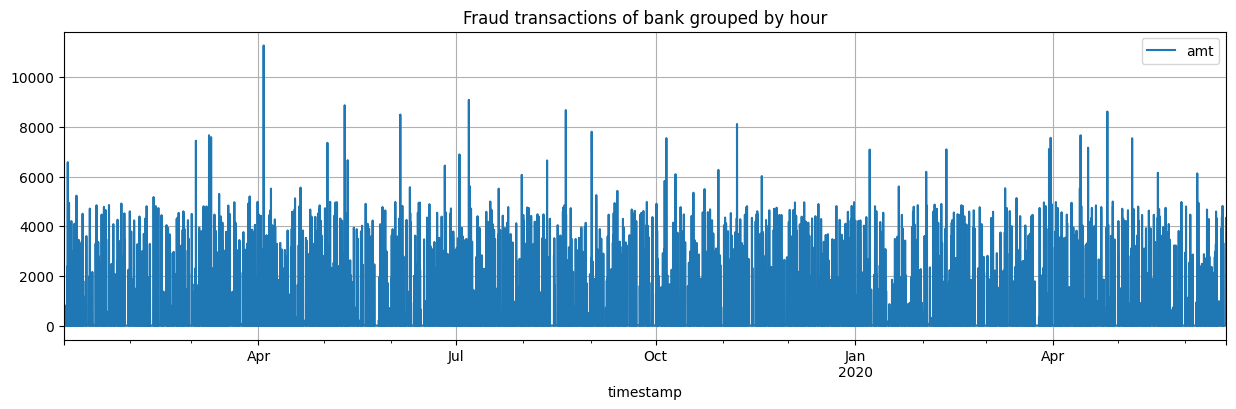

In [7]:
# all fraud records
fraud_by_hours.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions grouped by hour')
plt.show(block=False)

# credit card fraud
fraud_cc_by_hours.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions of credit card grouped by hour')
plt.show(block=False)

# bank fraud
fraud_b_by_hours.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions of bank grouped by hour')
plt.show(block=False)

#### Daily

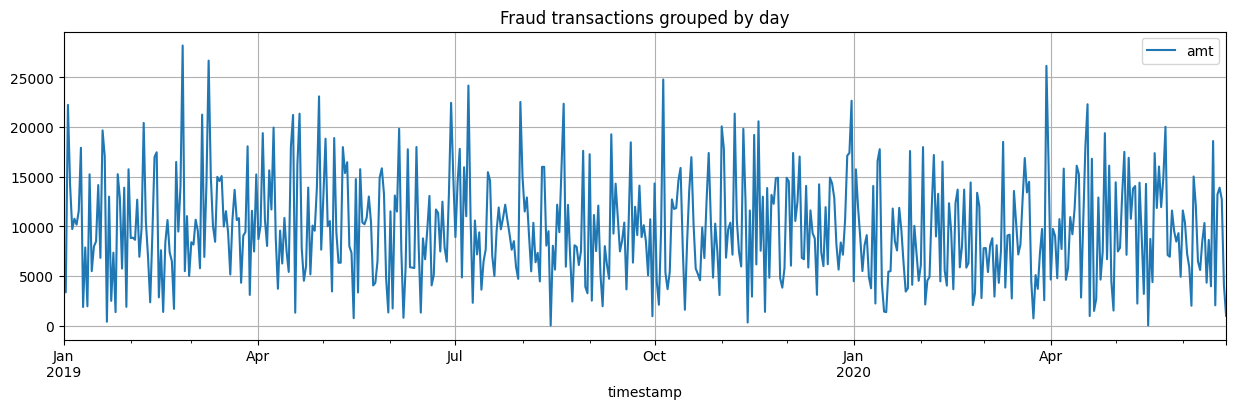

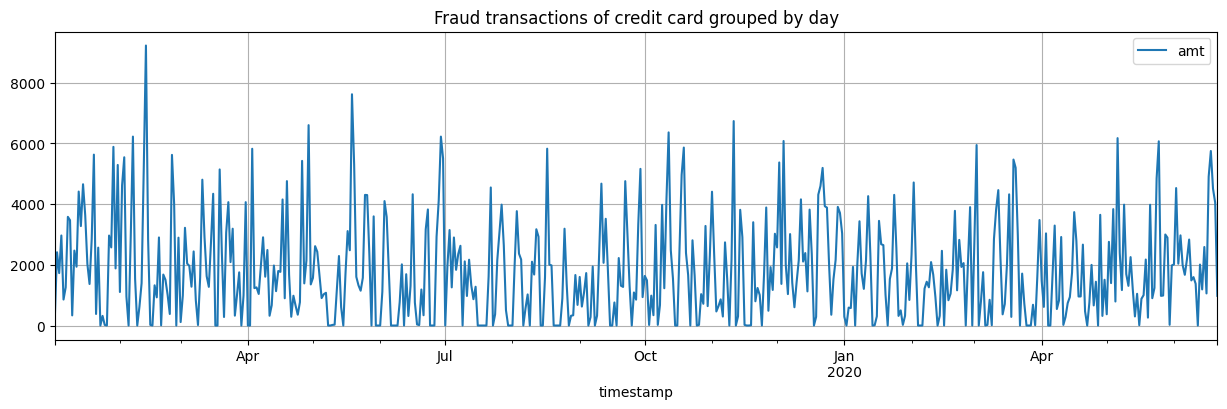

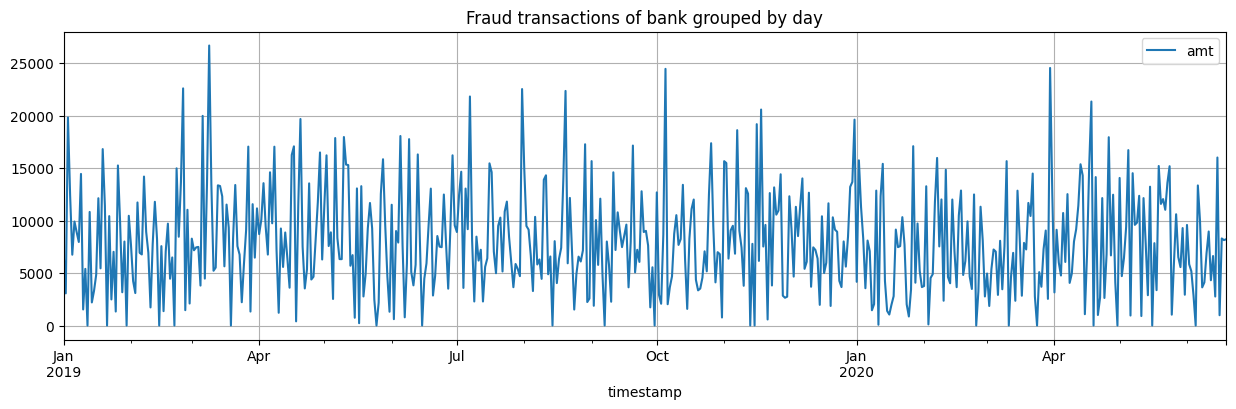

In [8]:
# all fraud records
fraud_by_days.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions grouped by day')
plt.show(block=False)

# credit card fraud records
fraud_cc_by_days.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions of credit card grouped by day')
plt.show(block=False)

# bank fraud records
fraud_b_by_days.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions of bank grouped by day')
plt.show(block=False)

The daily summation gave noisy distribution of the amounts of fraud. That is a reason why it was necessary to study the distribution weekly and monthly.

#### Weekly

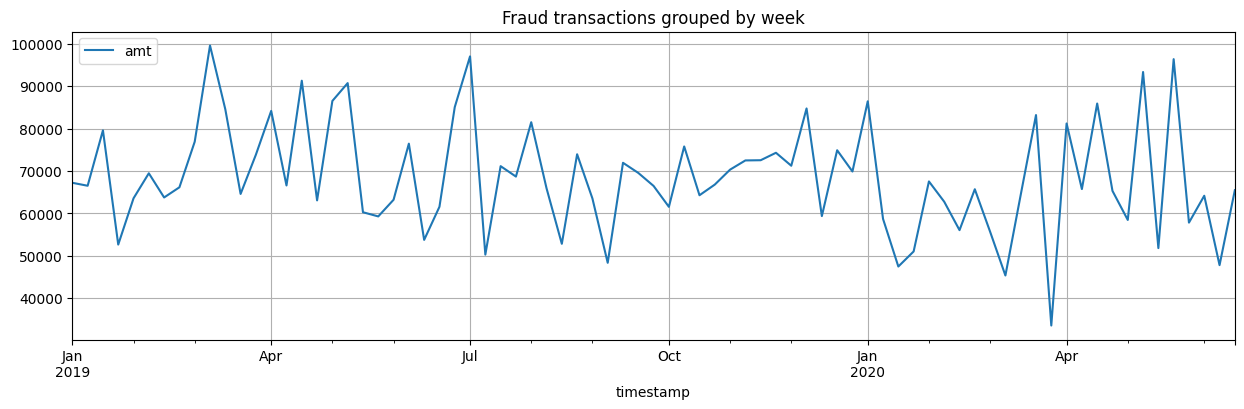

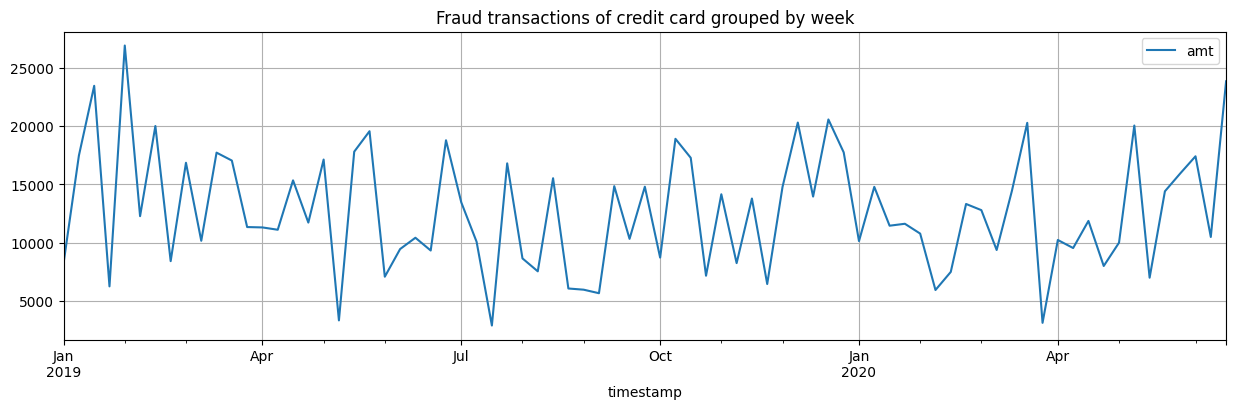

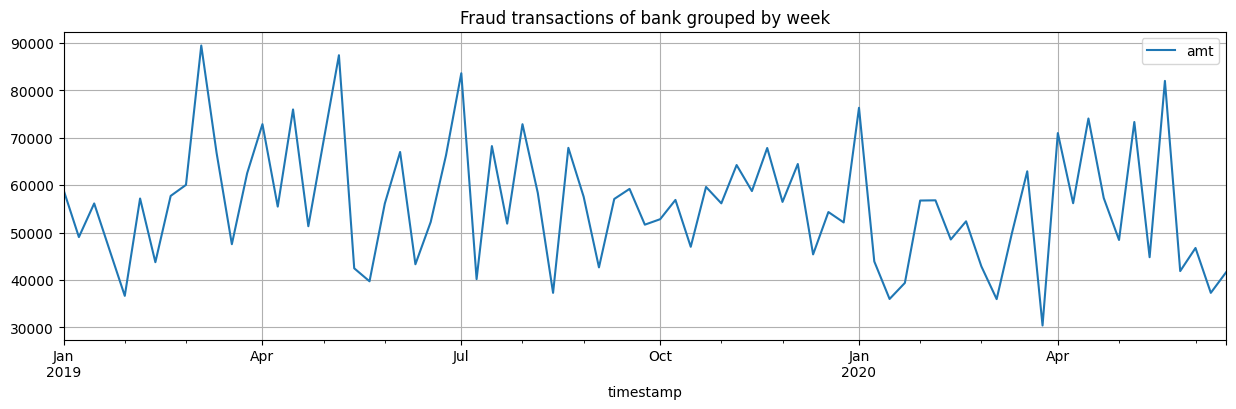

In [9]:
# all fraud
fraud_by_weeks.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions grouped by week')
plt.show(block=False)

# credit card fraud
fraud_cc_by_weeks.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions of credit card grouped by week')
plt.show(block=False)

# bank fraud
fraud_b_by_weeks.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions of bank grouped by week')
plt.show(block=False)

Diving more deep and summing the amounts by weeks reveals some additional spikes that didn't have a specific pattern, but seem to reach higher spikes in the first half of the year especially in the bank transactions.

#### Monthly

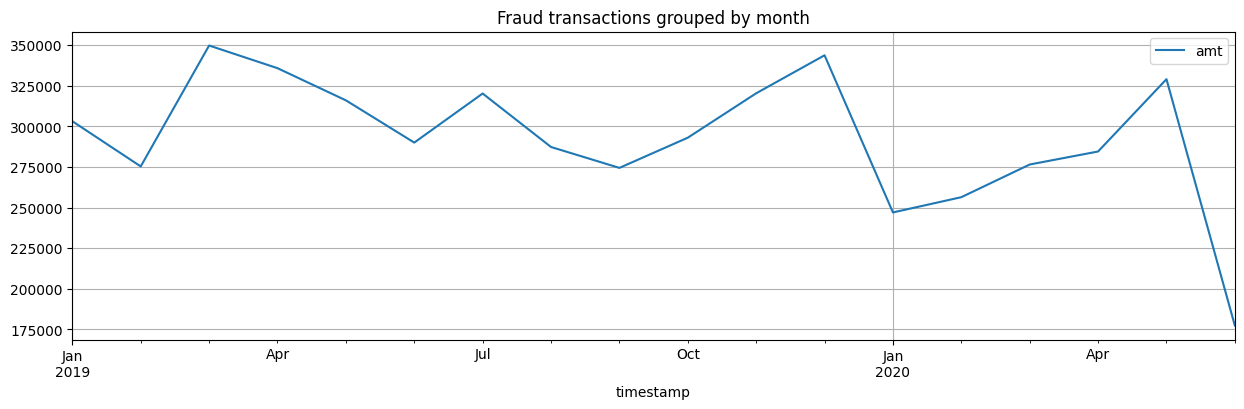

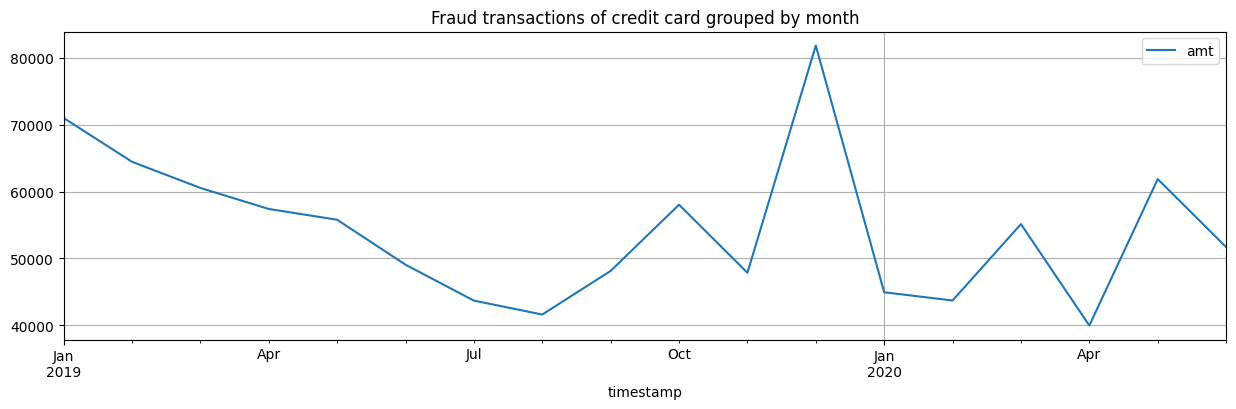

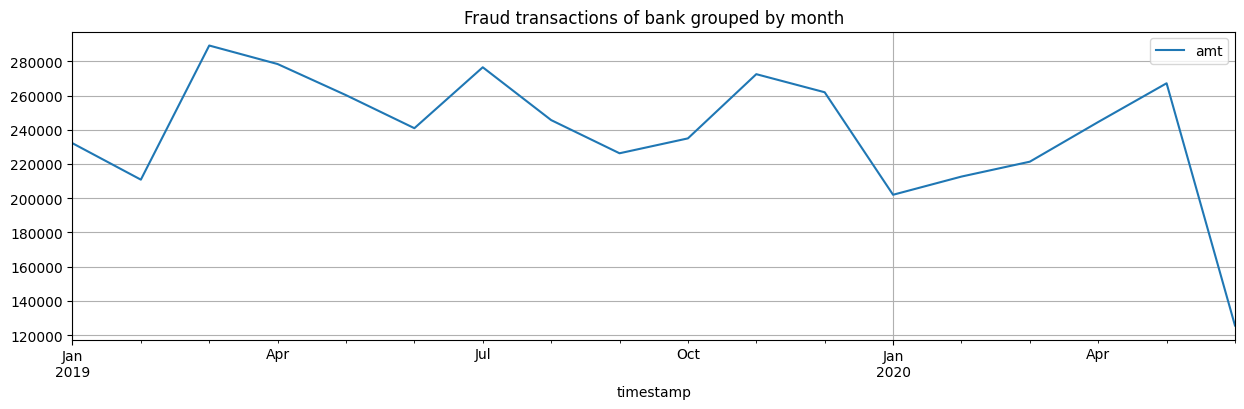

In [10]:
# all fraud
fraud_by_months.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions grouped by month')
plt.show(block=False)

# credit card fraud
fraud_cc_by_months.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions of credit card grouped by month')
plt.show(block=False)

# bank fraud
fraud_b_by_months.plot(figsize=(15, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Fraud transactions of bank grouped by month')
plt.show(block=False)

From the monthly sum of amounts of fraudulent transactions we can notice a pattern where the amount of those transactions reaches a spike every around 5 months. The credit card transactions seem to have a gradual decrease in the first half of 2019, then somehow followed a pattern by reaching a spike every 2 to 3 months with the total ot exceeding 90 000. However the bank transactions followed a pattern of spikes that reached 290 000 every 4 to 5 months with a minimum of 200 000. This shows that fraudulent bank transactions had very high amounts of fraud compared to credit card fraud.

### Seasonality study

This study will show the overall distribution, the trend graph that shows the overall direction the data is moving in, the seasonal graph that shows the repeating patterns or cycles, and the residual graph shows the remainder part of the data that cannot be explained by trend or seasonality.

#### Hourly

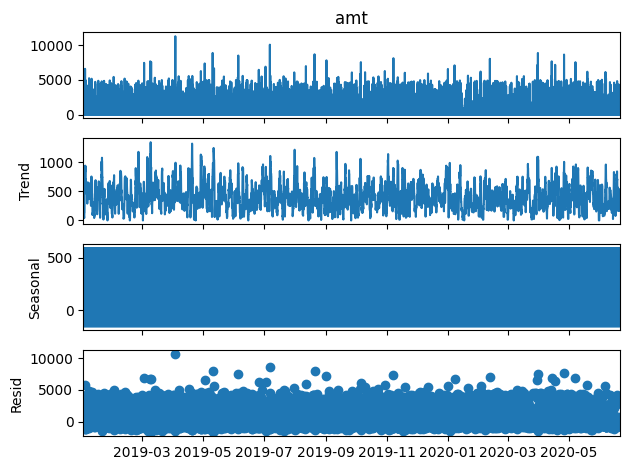

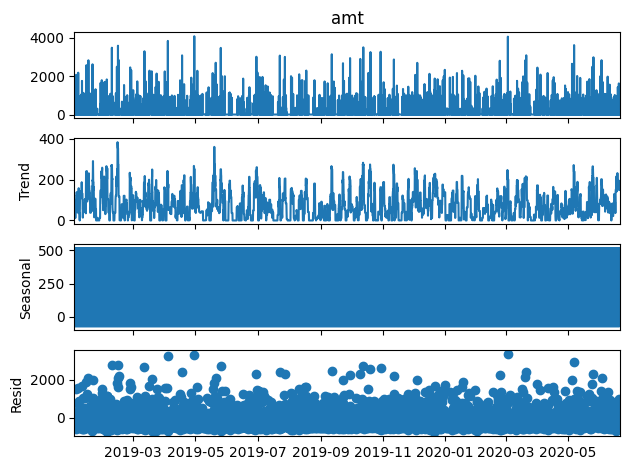

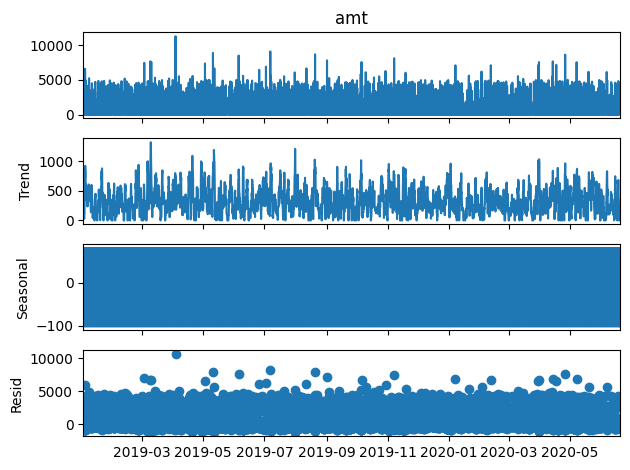

In [11]:
# all fraud
decomposition_f = seasonal_decompose(fraud_by_hours, model='additive')
decomposition_f.plot();

# credit card fraud
decomposition_cc = seasonal_decompose(fraud_cc_by_hours, model='additive')
decomposition_cc.plot();

# bank fraud
decomposition_b = seasonal_decompose(fraud_b_by_hours, model='additive')
decomposition_b.plot();

The hourly summation of amounts reveals no daily patterns in our data.

#### Daily

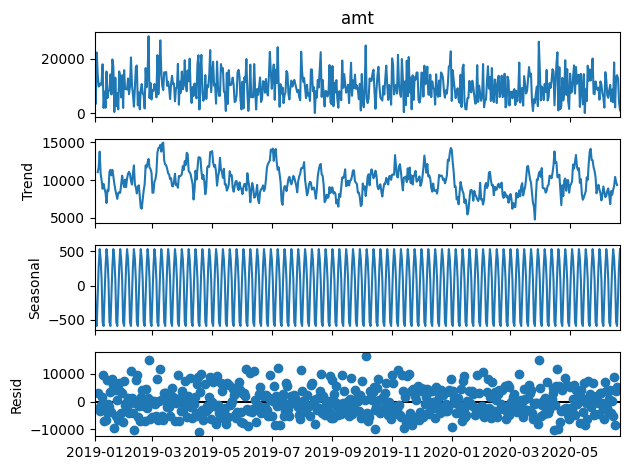

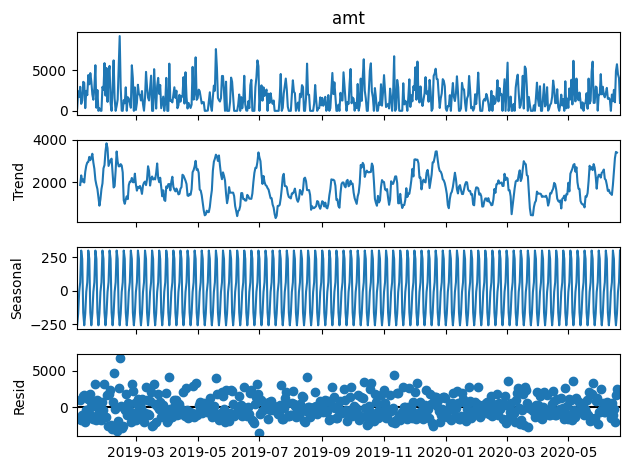

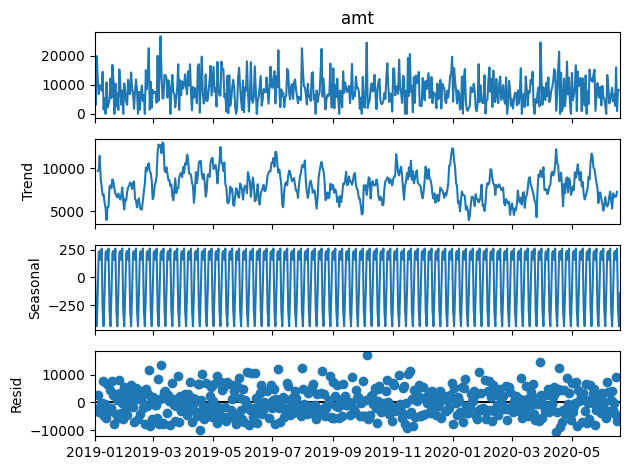

In [12]:
# all fraud
decomposition_f = seasonal_decompose(fraud_by_days, model='additive')
decomposition_f.plot();

# credit card fraud
decomposition_cc = seasonal_decompose(fraud_cc_by_days, model='additive')
decomposition_cc.plot();

# bank fraud
decomposition_b = seasonal_decompose(fraud_b_by_days, model='additive')
decomposition_b.plot();

Observing this seasonal distribution among days we can notice from the seasonal graph that there is a pattern repeated 4 times in a month that is once weekly as shown in the total amount of fraudulent transactions, and as we can notice in the residual graph that there are lots of noisy data that are values higher or lower than the predicted values. However while analyzing every fraud type separately we notice that the credit card fraud amounts follow a small pattern that doesn't appear much in the bank fraud amounts.

#### Weekly

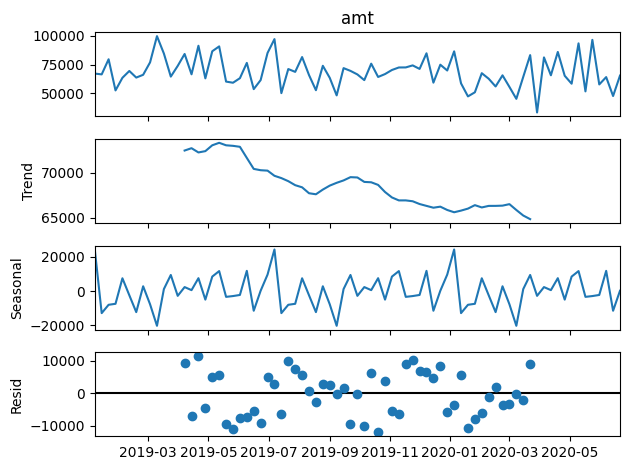

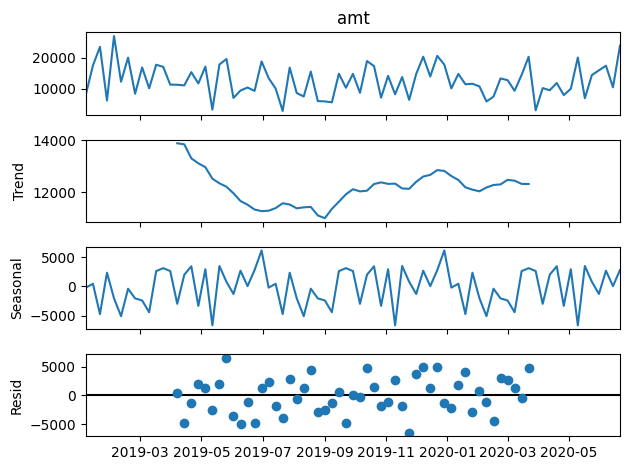

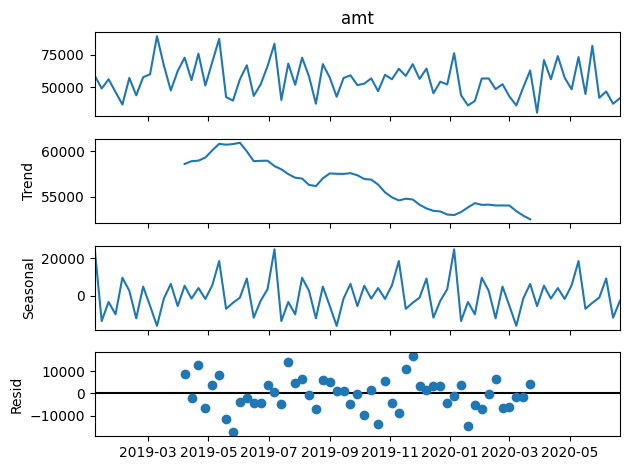

In [13]:
# all fraud
decomposition_f = seasonal_decompose(fraud_by_weeks, model='additive', period = 26)
decomposition_f.plot();

# credit card fraud
decomposition_cc = seasonal_decompose(fraud_cc_by_weeks, model='additive', period = 26)
decomposition_cc.plot();

# bank fraud
decomposition_b = seasonal_decompose(fraud_b_by_weeks, model='additive', period = 26)
decomposition_b.plot();

From this weekly distribution we can notice a decreasing trend of amounts of fraudulent transactions overall that comes from the overall decrease in the bank fraud amounts, it shows some pattern but nothing remarkable to be detected.While the credit card fraud amounts followedthe decrease in the first half of 2019 then followed a pattern of spikes that increased with time.

#### Monthly

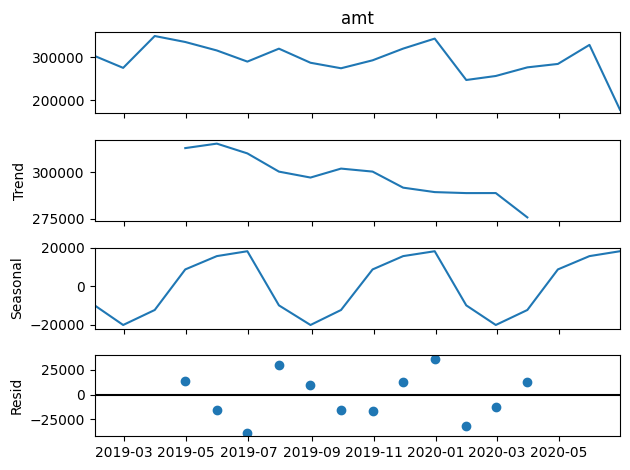

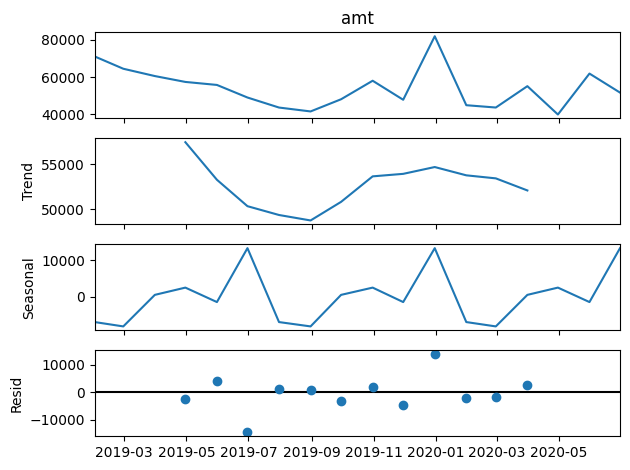

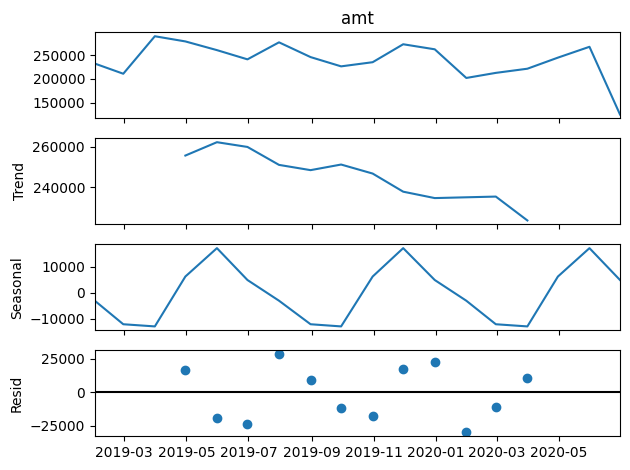

In [14]:
# all fraud
decomposition_f = seasonal_decompose(fraud_by_months, model='additive', period = 6)
decomposition_f.plot();

# credit card fraud
decomposition_cc = seasonal_decompose(fraud_cc_by_months, model='additive', period = 6)
decomposition_cc.plot();

# bank fraud
decomposition_b = seasonal_decompose(fraud_b_by_months, model='additive', period = 6)
decomposition_b.plot();

The overall monthly summation reveals a pattern in the seasonal analysis to be a peak every 6 months, the same pattern is revealed in the bank fraud, while the credit card fraud follows a somehow different pattern to be every 7 months and having 2 spikes.

### Anomaly detection

In [15]:
# split the series into 2019 and 2020
df_cc_2019 = df_fraud_cc.loc['2019']
df_cc_2020 = df_fraud_cc.loc['2020']

# calculate rolling mean
new_df_cc = df_fraud_cc.copy()
new_df_cc['forecast_amounts'] = df_fraud_cc['amt'].rolling(7).mean()

# forecast the values of 2020 by mean
new_df_cc.loc['2020', 'forecast_amounts'] = new_df_cc.loc['2019','forecast_amounts'].mean()

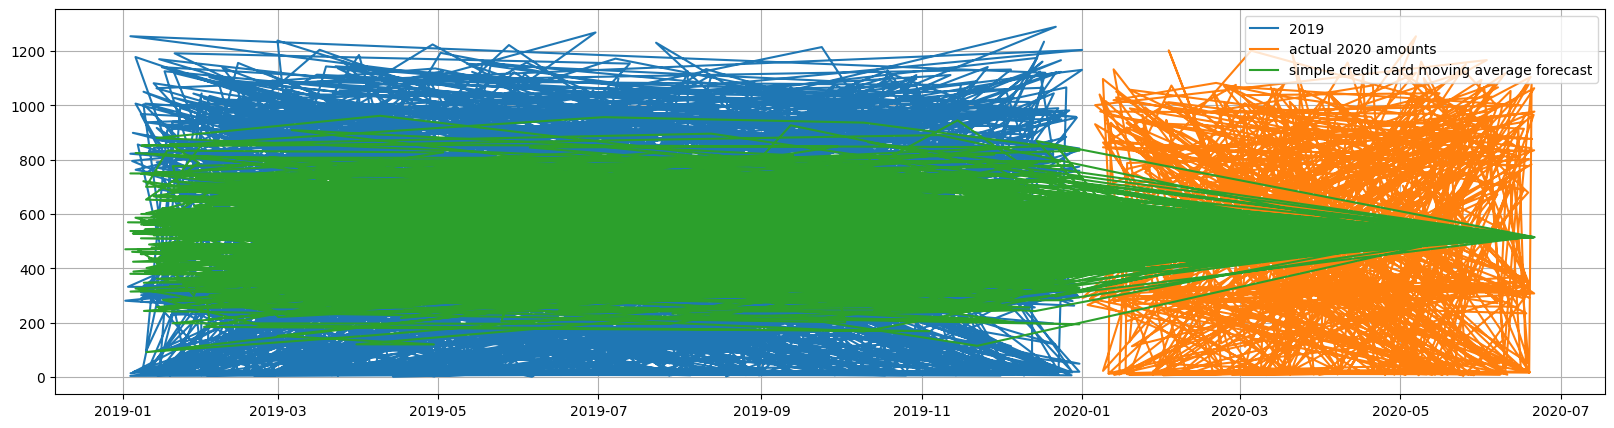

In [16]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(df_cc_2019['amt'], label = '2019')
plt.plot(df_cc_2020['amt'], label = 'actual 2020 amounts')
plt.plot(new_df_cc['forecast_amounts'], label = 'simple credit card moving average forecast')
plt.legend(loc='best')
plt.show()

In [17]:
rmse = np.sqrt(mean_squared_error(df_cc_2020['amt'], new_df_cc.loc['2020','forecast_amounts'])).round(2)
print(rmse)


378.46


The predicted values of the rolling window seem to be in the range of actual values, but the error between predicted and actual values has a high value compared to the range of transaction amount being about 380 in a range 0-1200. This error may be due to lack of some pattern in the fraudulent activities in the transactiones studied.

In [18]:
# split the series into 2019 and 2020
df_b_2019 = df_fraud_b.loc['2019']
df_b_2020 = df_fraud_b.loc['2020']

# calculate rolling mean
new_df_b = df_fraud_b.copy()
new_df_b['forecast_amounts'] = df_fraud_b['amt'].rolling(7).mean()

# forecast the values of 2020 by mean
new_df_b.loc['2020', 'forecast_amounts'] = new_df_b.loc['2019','forecast_amounts'].mean()

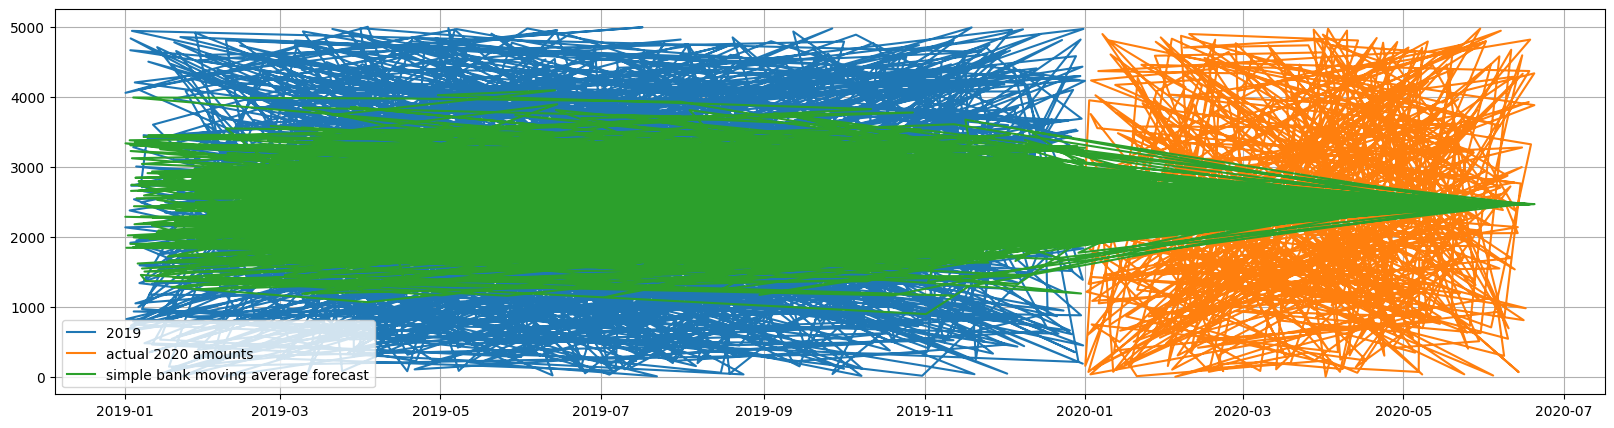

In [19]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(df_b_2019['amt'], label = '2019')
plt.plot(df_b_2020['amt'], label = 'actual 2020 amounts')
plt.plot(new_df_b['forecast_amounts'], label = 'simple bank moving average forecast')
plt.legend(loc='best')
plt.show()

In [20]:
rmse = np.sqrt(mean_squared_error(df_b_2020['amt'], new_df_b.loc['2020','forecast_amounts'])).round(2)
print(rmse)

1449.86


The predicted values of the rolling window seem to be in the range of actual values, but the error between predicted and actual values has a high value compared to the range of transaction amount being about 1450 in a range 0-5000. This error may be due to lack of some pattern in the fraudulent activities in the transactiones studied.

### Conclusion

The fraudulent activities of bank and credit card transactions didn't follow a very obvious and clear pattern, but only few spikes that were repeated every period of time. However it is remarkable to notice that fraudulent activities on bank transactions reached higher values than that of credit card transactions.